In [1]:
import pandas as pd
import numpy as np

C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('properties.csv')

In [3]:
df = df[~(df['floor_category'].isnull())]

In [4]:
df.shape

(3752, 13)

In [5]:
df.isnull().sum()

property_type      0
sector             0
price              0
bedRoom            0
bathroom           0
balcony            0
agePossession      0
built_up_area      0
servant room       0
store room         0
furnishing_type    0
luxury_category    0
floor_category     0
dtype: int64

In [6]:
df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
296,flat,sector 90,0.90,3,4,3,Relatively New,1765.0,1,0,unfurnished,High,Mid Floor
965,house,sohna road,0.07,1,1,0,Relatively New,33.0,0,0,unfurnished,Low,Low Floor
847,flat,sector 53,5.00,3,4,3,Old Property,3222.0,1,0,semifurnished,Low,Mid Floor
1633,flat,sector 28,2.30,3,3,3,Moderately Old,1777.0,1,0,unfurnished,Medium,Mid Floor
2070,flat,sohna road,0.73,2,2,3,Relatively New,978.0,0,0,unfurnished,Low,Mid Floor


In [7]:
df.groupby(['property_type'])['price'].median()

property_type
flat     1.38
house    4.00
Name: price, dtype: float64

['property_type',
 'sector',
 'agePossession',
 'furnishing_type',
 'luxury_category',
 'floor_category']

In [10]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,1.38,sector 53,7.40,4,4,3,Under Construction,2477.0,0,0,unfurnished,Low,High Floor
1,1.38,sector 33,1.50,3,3,3,Under Construction,1403.0,0,0,unfurnished,Medium,Mid Floor
2,1.38,sector 33,1.15,2,2,2,Under Construction,103.0,0,0,unfurnished,Low,High Floor
3,4.00,sector 3,3.50,1,1,0,Moderately Old,3800.0,0,0,unfurnished,Low,Low Floor
4,1.38,sector 106,1.15,3,4,4,Relatively New,1186.0,1,0,semifurnished,High,High Floor


C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_3260\1155439488.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['property_type']=='flat']['price'])
C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\RISHABH AGRAWAL\anaconda3\Lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(

<Axes: xlabel='price'>

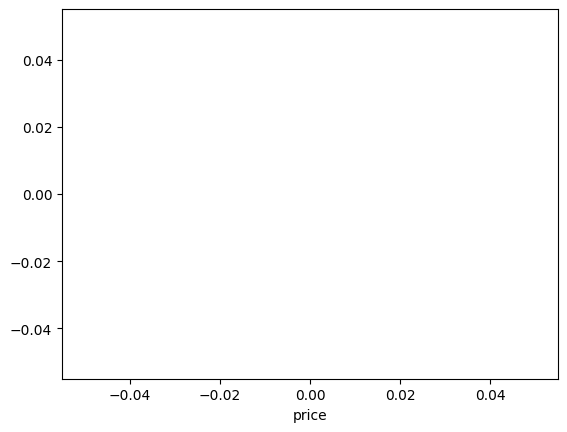

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df[df['property_type']=='flat']['price'])

In [12]:
# Assuming df is your pandas DataFrame
filtered_df = df[(df['property_type'] == 'flat') & (df['price'] >= 10)]


In [13]:
filtered_df

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category


In [14]:
df = df[~((df['property_type']=='flat') & (df['price']==14.00))]

In [15]:
df.shape

(3752, 13)

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
encoder = OneHotEncoder(sparse_output=False)

# Assuming that 'df' is your DataFrame and 'column_to_encode' is the column you want to encode
encoded_columns = encoder.fit_transform(df[['property_type','sector','floor_category']])

# The result is a numpy array of encoded columns
encoded_columns


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [17]:
df.reset_index(drop=True, inplace=True)
# Assuming that 'df' is your DataFrame and 'encoded_columns' is the one-hot encoded numpy array

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())

# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [18]:
# Check for any null values
if df.isnull().values.any():
    print("Null values found in the DataFrame after encoding:")
    print(df[df.isnull().any(axis=1)])
else:
    print("No null values found in the DataFrame after encoding.")

print(df)

No null values found in the DataFrame after encoding.
      property_type      sector  price  bedRoom  bathroom  balcony  \
0              1.38   sector 53   7.40        4         4        3   
1              1.38   sector 33   1.50        3         3        3   
2              1.38   sector 33   1.15        2         2        2   
3              4.00    sector 3   3.50        1         1        0   
4              1.38  sector 106   1.15        3         4        4   
...             ...         ...    ...      ...       ...      ...   
3747           1.38  sector 37d   1.65        3         3        2   
3748           1.38   sector 48   3.45        3         3        3   
3749           1.38  sohna road   0.39        2         2        2   
3750           1.38   sector 78   1.20        3         3        2   
3751           1.38   sector 61   1.60        2         2        2   

           agePossession  built_up_area  servant room  store room  ...  \
0     Under Construction       

In [19]:
df =df.drop(columns=['sector','property_type','floor_category'])

In [20]:
df.head()

,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,...,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sohna road,sector_sohna road road,floor_category_High Floor,floor_category_Low Floor,floor_category_Mid Floor
0,7.40,4,4,3,Under Construction,2477.0,0,0,unfurnished,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.50,3,3,3,Under Construction,1403.0,0,0,unfurnished,Medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.15,2,2,2,Under Construction,103.0,0,0,unfurnished,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.50,1,1,0,Moderately Old,3800.0,0,0,unfurnished,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.15,3,4,4,Relatively New,1186.0,1,0,semifurnished,High,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
df.groupby(['furnishing_type'])['price'].median()  # ordinal encode 

def encode_furnish(ftype):
    if ftype=='furnished':
        return 2.32
    elif ftype=='semifurnished':
        return 2.10
    else:
        return 1.30
def en(df):
    df['furnishing_type']=df['furnishing_type'].apply(encode_furnish)
    return df


In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('encode', en(df))
])
transformed = pipeline.fit(df)
print(transformed)

TypeError: en() missing 1 required positional argument: 'df'

In [22]:
df.head()

,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,...,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sohna road,sector_sohna road road,floor_category_High Floor,floor_category_Low Floor,floor_category_Mid Floor
0,7.40,4,4,3,Under Construction,2477.0,0,0,1.3,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.50,3,3,3,Under Construction,1403.0,0,0,1.3,Medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.15,2,2,2,Under Construction,103.0,0,0,1.3,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.50,1,1,0,Moderately Old,3800.0,0,0,1.3,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.15,3,4,4,Relatively New,1186.0,1,0,2.1,High,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
df.groupby(['luxury_category'])['price'].median()

def encode_luxury(ltype):
    if ltype=='High':
        return 1.95
    elif ltype=='Medium':
        return 1.535
    else:
        return 1.325
df['luxury_category']=df['luxury_category'].apply(encode_luxury)

In [24]:
df.groupby(['agePossession'])['price'].median()

def encode_ap(atype):
    if atype=='Moderately Old':
        return 1.85
    elif atype=='New Property':
        return 1.35
    elif atype=='Old Property':
        return 2.20
    elif atype=='Relatively New':
        return 1.45
    else:
        return 1.33
df['agePossession']=df['agePossession'].apply(encode_ap)

In [25]:
df.sample(5)

,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,...,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sohna road,sector_sohna road road,floor_category_High Floor,floor_category_Low Floor,floor_category_Mid Floor
738,1.25,2,2,3,1.35,938.00,0,0,1.3,1.325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1373,0.95,2,2,4,1.35,1175.97,0,0,1.3,1.535,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
220,2.65,3,4,4,1.85,2037.00,1,0,2.1,1.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,1.15,3,2,4,1.45,1463.00,0,0,2.1,1.535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2058,0.33,2,2,1,1.35,694.00,0,0,2.1,1.535,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df.isnull().sum()

price                        0
bedRoom                      0
bathroom                     0
balcony                      0
agePossession                0
                            ..
sector_sohna road            0
sector_sohna road road       0
floor_category_High Floor    0
floor_category_Low Floor     0
floor_category_Mid Floor     0
Length: 130, dtype: int64

In [28]:
X = df.iloc[:,1:]
X

,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,property_type_flat,...,sector_sector 93,sector_sector 95,sector_sector 99,sector_sector 99a,sector_sector 9a,sector_sohna road,sector_sohna road road,floor_category_High Floor,floor_category_Low Floor,floor_category_Mid Floor
0,4,4,3,1.33,2477.0,0,0,1.30,1.325,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,3,3,1.33,1403.0,0,0,1.30,1.535,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,2,1.33,103.0,0,0,1.30,1.325,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,0,1.85,3800.0,0,0,1.30,1.325,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,4,4,1.45,1186.0,1,0,2.10,1.950,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,3,3,2,1.45,1699.0,0,0,1.30,1.535,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3746,3,3,3,1.85,1869.0,0,0,1.30,1.325,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3747,2,2,2,1.45,720.0,0,0,1.30,1.325,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3748,3,3,2,1.85,2045.0,0,0,2.32,1.325,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
y=df['price']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.30,  
                                   shuffle=True) 

In [86]:
dtree = DecisionTreeRegressor(criterion='absolute_error', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)

In [87]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=4, min_samples_split=10)

In [88]:
dtree.score(X_train,y_train)

0.7738770227225601

In [89]:
dtree.score(X_test,y_test)

0.6229075025710555

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None,max_samples=1000, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [91]:
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_samples=1000)

In [92]:
rf.score(X_test,y_test)

0.7600148130148191

In [93]:
y_pred = rf.predict(X_test)

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.6926521777777778

In [9]:
df.head()
    
    

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 53,7.40,4,4,3,Under Construction,2477.0,0,0,unfurnished,Low,High Floor
1,flat,sector 33,1.50,3,3,3,Under Construction,1403.0,0,0,unfurnished,Medium,Mid Floor
2,flat,sector 33,1.15,2,2,2,Under Construction,103.0,0,0,unfurnished,Low,High Floor
3,house,sector 3,3.50,1,1,0,Moderately Old,3800.0,0,0,unfurnished,Low,Low Floor
4,flat,sector 106,1.15,3,4,4,Relatively New,1186.0,1,0,semifurnished,High,High Floor


In [13]:
df.columns.values

array(['property_type', 'sector', 'price', 'bedRoom', 'bathroom',
       'balcony', 'agePossession', 'built_up_area', 'servant room',
       'store room', 'furnishing_type', 'luxury_category',
       'floor_category'], dtype=object)